In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [138]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colWidth' , None)

In [139]:
df = pd.read_csv('Gurgaon_Properties_cleaned_Data_V1.csv')

In [140]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Property_type    3803 non-null   object 
 1   society          3802 non-null   object 
 2   sector           3803 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   int64  
 8   bathroom         3803 non-null   int64  
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  floorNum         3784 non-null   float64
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(4),

In [142]:
df.head(2)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 12,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,not available,2.0,South-West,10+ Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'M Goel Hospital', 'Dental Health Centre', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Kharbanda Maternity and Nursing Home', 'Jackson Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sarvejeet Singh', 'Gupta Hospital Gurgaon', 'Ahooja Eye and Dental Institute Hospital', 'Dr. Sandeep Chauhan', 'Bhatnagar Maternity and Nursing Home', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Sharma Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Sparsh Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Bindal Clinic', 'Ravi Clinic and Health Care Centre', 'M.S Hospital', 'My Care Clinic', 'GH Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Nidhi Clinic', 'Aryan Hospital', 'Saraswati Hospital Gurgaon', 'Geeta Nursing Home Gurgaon', 'Dr. Tomar Clinic', 'Chiranjiv Hospital', 'Dr. Babita Sharma', 'Children Hospital', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",NaN,['Water Storage']
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Water Purifier', '5 Fan', '3 Geyser', '1 Stove', '20 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [143]:
# focus on -> agePseeseeion, furnishDetail , feature, addiionalroom

## area with type

In [144]:

df[['area' , 'areaWithType']].sample(5)

,area,areaWithType
3794,3156.0,Super Built up area 3156(293.2 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.)
2911,783.0,Built Up area: 1423 (132.2 sq.m.)Carpet area: 783 sq.ft. (72.74 sq.m.)
2839,67.0,Plot area 67(6.22 sq.m.)
2920,2403.0,Plot area 267(223.25 sq.m.)
782,1230.0,Plot area 1737(161.37 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1230 sq.ft. (114.27 sq.m.)


In [145]:
# area column is not consistent and not reliable beacause in area it shows diffrent type of area not a particular type
# in area with type there are certain rows which shows the 3 diffrent areas or single area -> plot area, carpet area , super builtup area, builtup area

In [146]:
# area with type -> super built up area , builtup area , carpet area  3 new columns -> in sqft

In [147]:

# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [148]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [149]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [150]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [151]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area'],
      dtype='object')

In [152]:
df[['price' , 'Property_type' , 'area' ,'areaWithType', 'super_built_up_area' , 'built_up_area' , 'carpet_area']].head()

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,NaN,NaN
1,0.86,flat,1342.0,Super Built up area 1342(124.68 sq.m.),1342.0,NaN,NaN
2,2.55,flat,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),1860.0,1600.0,1400.0
3,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,NaN,NaN
4,8.95,house,5000.0,Plot area 5000(464.52 sq.m.),NaN,NaN,NaN


In [153]:
df[['price','Property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,0.85,flat,750.0,Carpet area: 750 (69.68 sq.m.),NaN,NaN,750.0
239,0.62,house,192.0,Built Up area: 192 (17.84 sq.m.),NaN,192.0,NaN
2870,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
1754,1.80,house,2360.0,Built Up area: 2360 (219.25 sq.m.),NaN,2360.0,NaN
1029,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [154]:
df[df['areaWithType'].str.contains('Plot')][['price','Property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head()

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,NaN,NaN
3,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,NaN,NaN
4,8.95,house,5000.0,Plot area 5000(464.52 sq.m.),NaN,NaN,NaN
8,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
13,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN


In [155]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [156]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','Property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [157]:
all_nan_df.head()

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,NaN,NaN
3,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,NaN,NaN
4,8.95,house,5000.0,Plot area 5000(464.52 sq.m.),NaN,NaN,NaN
8,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
13,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN


In [158]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','Property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [159]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [160]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)  # in cases of houses builtup area and plot area are same

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [161]:
all_nan_df

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,2700.00,NaN
3,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,250.00,NaN
4,8.95,house,5000.0,Plot area 5000(464.52 sq.m.),NaN,5000.00,NaN
8,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
13,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.00,NaN
17,6.50,house,4320.0,Plot area 480(401.34 sq.m.),NaN,480.00,NaN
24,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,232.00,NaN
32,15.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
50,10.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
57,4.60,house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.00,NaN


In [162]:

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):  # 9 * sq yard = sq ft and 10.7 sq.m = sqft
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [163]:

all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [164]:
all_nan_df.head()

,price,Property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,2700.0,NaN
3,10.00,house,250.0,Plot area 250(23.23 sq.m.),NaN,250.0,NaN
4,8.95,house,5000.0,Plot area 5000(464.52 sq.m.),NaN,5000.0,NaN
8,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.0,NaN
13,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,981.0,NaN


In [165]:
# update the original dataframe
df.update(all_nan_df)

In [166]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [167]:
df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 12,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,not available,2.0,South-West,10+ Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'M Goel Hospital', 'Dental Health Centre', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Kharbanda Maternity and Nursing Home', 'Jackson Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sarvejeet Singh', 'Gupta Hospital Gurgaon', 'Ahooja Eye and Dental Institute Hospital', 'Dr. Sandeep Chauhan', 'Bhatnagar Maternity and Nursing Home', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Sharma Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Sparsh Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Bindal Clinic', 'Ravi Clinic and Health Care Centre', 'M.S Hospital', 'My Care Clinic', 'GH Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Nidhi Clinic', 'Aryan Hospital', 'Saraswati Hospital Gurgaon', 'Geeta Nursing Home Gurgaon', 'Dr. Tomar Clinic', 'Chiranjiv Hospital', 'Dr. Babita Sharma', 'Children Hospital', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",NaN,['Water Storage'],NaN,2700.0,NaN
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Water Purifier', '5 Fan', '3 Geyser', '1 Stove', '20 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1342.0,NaN,NaN
2,flat,ambience creacions,sector 22,2.55,13709.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,others,8.0,North-East,1 to 5 Year Old,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['3 Wardrobe', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Washing Machine', '16 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water so

## 2. Additional Room

In [168]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
store room,99
"study room,servant room",99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [169]:
# there are 5 type of additional room
# servent room
# study room
# pooja room
# store room
# others

In [170]:
# List of new Columns
new_cols = ['study room', 'servant room', 'store room' , 'pooja room', 'others']

# populate the new columns based on other additionalroom columns
for col in new_cols:
  df[col] = df['additionalRoom'].astype(str).str.contains(col).astype(int)

In [171]:
df.sample(5)[['additionalRoom' , 'study room', 'servant room', 'store room' , 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3183,store room,0,0,1,0,0
3362,"pooja room,study room,store room",1,0,1,1,0
1437,servant room,0,1,0,0,0
3242,servant room,0,1,0,0,0
2162,study room,1,0,0,0,0


## 3. Age Possession

In [172]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
2023-12-01 00:00:00,22


In [173]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"

    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"

    if "1 to 5 Year Old" in value:
        return "Relatively New"

    if "5 to 10 Year Old" in value:
        return "Moderately Old"

    if "10+ Year Old" in value:
        return "Old Property"

    if "Under Construction" in value or "By" in value:
        return "Under Construction"

    try:
        # For entries like timestamps or '2024-03-01'
        dt = pd.to_datetime(value, errors='coerce')
        if not pd.isna(dt):
            if dt.year >= 2025:
                return "Under Construction"
            else:
                return "New Property"
    except:
        pass

    try:
        # For strings like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"


In [174]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [175]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,739
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,170


## 3. Furnish Details

In [183]:
df.sample(5)[['furnishDetails', 'features']]

,furnishDetails,features
3762,"['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '5 Geyser', '18 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
346,"['2 Wardrobe', '1 Exhaust Fan', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
3164,"['1 Water Purifier', '1 Exhaust Fan', '1 Stove', '1 Microwave', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Park', 'Piped-gas', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']"
1632,"['9 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
789,[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [191]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [192]:
furnishings_df.shape

(3803, 19)

In [193]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [197]:
furnishings_df.sample(5)

,Geyser,Water Purifier,Exhaust Fan,Modular Kitchen,Wardrobe,AC,Stove,Chimney,Fridge,Light,Dining Table,Microwave,Curtains,Washing Machine,TV,Bed,Fan,Sofa
2709,3,1,1,0,4,2,0,0,0,12,0,0,0,0,0,0,9,0
3216,0,0,0,1,0,6,0,1,0,0,0,0,0,0,0,0,0,0
1115,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2638,0,0,1,0,4,0,0,1,0,15,0,0,1,0,0,0,8,0


In [198]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [200]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

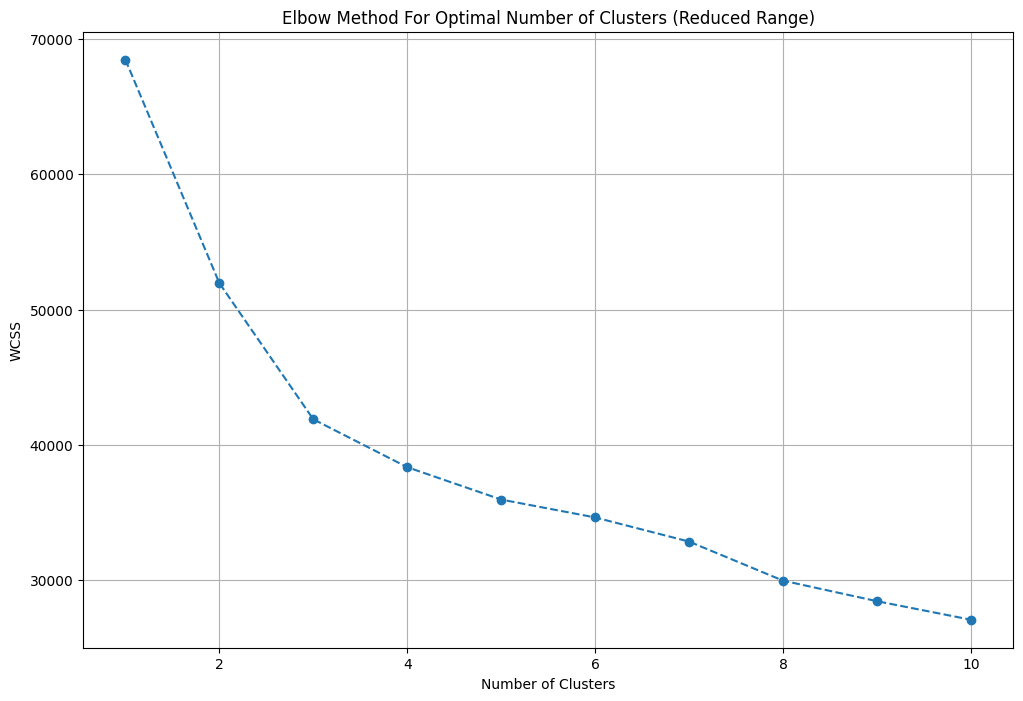

In [201]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [202]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [203]:
df = df.iloc[:,:-18]

In [204]:
df['furnishing_type'] = cluster_assignments

In [205]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3024,NaN,1
2375,"['3 Fan', '10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
331,"['4 Fan', '1 Exhaust Fan', '5 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
691,NaN,1
162,NaN,1


In [206]:
app_df = pd.read_csv('appartments.csv')

In [208]:
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [209]:
app_df['PropertyName']  = app_df['PropertyName'].str.lower()

In [210]:
temp_df = df[df['features'].isnull()]

In [212]:
temp_df.shape

(635, 26)

In [214]:
x = temp_df.merge(app_df , left_on = 'society' , right_on = 'PropertyName' , how = 'left')['TopFacilities']

In [215]:
df.loc[temp_df.index , 'features'] = x.values

In [216]:
df['features'].isnull().sum()

np.int64(481)

In [217]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [218]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [219]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2135,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
1731,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [220]:
features_binary_df.shape

(3803, 130)

In [221]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

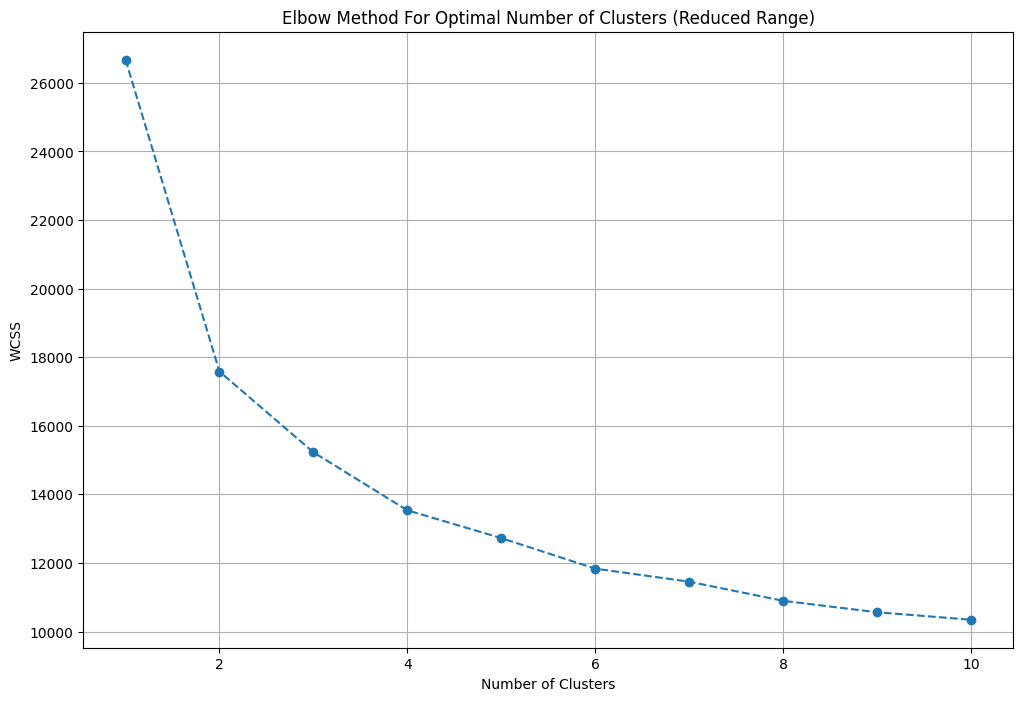

In [222]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

- It tells that there could be only 2 cluster but after seeing the cluster it tells all nan value into budget category and remaining values in luxury category which is not reliable so for this i change this approch and go to new apporoch which is **luxury score**

In [223]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [224]:
df['luxury_score'] = luxury_score

In [226]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [227]:
df.sample(5)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
189,flat,shree vardhman victoria,sector 70,1.60,8205.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,3,3,10.0,South,Relatively New,1950.0,NaN,1161.0,1,1,0,1,1,1,43
2041,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5,5,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,1,112
3407,house,independent,sector 57,6.21,23000.0,2700.0,Plot area 300(250.84 sq.m.),6,6,3+,4.0,North-East,Old Property,NaN,2700.0,NaN,1,1,1,1,0,1,52
3747,flat,dlf new town heights,sector 86,1.30,6735.0,1930.0,Super Built up area 1930(179.3 sq.m.),3,3,3,12.0,North,Moderately Old,1930.0,NaN,NaN,0,1,0,0,0,2,165
788,flat,the arzoo cghs,sector 51,2.10,9130.0,2300.0,Built Up area: 2300 (213.68 sq.m.),4,4,3,1.0,NaN,Relatively New,NaN,2300.0,NaN,0,0,0,0,0,1,58


In [228]:
df.shape

(3803, 23)

In [229]:
df.to_csv('Gurgaon_Properties_cleaned_V2.csv',index=False)